<a href="https://colab.research.google.com/github/michaelnimmer/michaelnimmer.github.io/blob/master/jobDescriptions-WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will create a word-cloud based on job descriptions pulled from the Google Jobs API.

In [2]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
!pip install google-search-results
from serpapi import GoogleSearch  # we use serpapi to query google jobs database

  Created wheel for google-search-results: filename=google_search_results-2.4.0-py3-none-any.whl size=19876 sha256=06831f4756ae5c3ea4fb1dbcd90b79ee0cd457ce269f2885d001b983bfa971e3
  Stored in directory: /root/.cache/pip/wheels/93/32/5f/313cc6b6c013f9c6386fc0a75d10b6b1aa7fe6867acc704d41
Successfully built google-search-results


In [4]:
job_title = "Web Developer" # you can change the job title to whatever you wish
api_key = "acde06f2fe58ce00928f325bac6c30ae4b8a8ec248cf726bde7e86b8b054e021" # set up an account with serpapi to get the key
params = {
  "api_key": api_key,
  "engine": "google_jobs",
  "google_domain": "google.com",
  "q": job_title,
  "start": "0"
}

In [6]:
results = dict()
for i in range(50):
    params["start"] = str(i)
    search = GoogleSearch(params)
    new_results = search.get_dict() 
    # try/except to avoid occassional error when "jobs_results" object seems to be missing
    try:
      if len(results.keys()) != 0:
          results["jobs_results"] += new_results["jobs_results"]
      else:
          results = new_results
    except Exception as e:
      print(e)
file_name = 'data.json'

with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4) # store results in a 'data.json' file

Now that we have our jobs results, we need to clean the data before creating the word cloud. First, we can download the nltk stopword list–this is a list of words that we don't want to include in the word cloud ('the', 'of', etc.). It may be beneficial to add additional stopwords later, but this will be a good starting point.

In [7]:
# we will use the nltk stopwords list as a starting point
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
with open(file_name, 'r') as f:
    jobs_results = json.load(f)["jobs_results"]

jobs_filtered = []
for i, job in enumerate(jobs_results):
    jobs_filtered.append({})
    jobs_filtered[i]['title'] = job['title']
    jobs_filtered[i]['description'] = job['description']

# for this project we will only be getting the job description, so the title can actually be ignored
descrips = [jobs_filtered[i]['description'] for i in range(len(jobs_filtered))]

In [10]:
print(len(descrips)) # check length to make sure it is working properly
df = pd.DataFrame(descrips, columns=['text']) # define a data frame to work with the descriptions 
tokens = []

# loop through each description
for i in df.text:
    # split into tokens
    text_tokens = word_tokenize(i)

    # remove words we don't want
    text_tokens = [word for word in text_tokens if not word in stopwords.words('english')]
    # text_tokens = [word for word in text_tokens if not word in stop_words]

    # loop through tokens to clean text/remove extraneous characters
    for j in text_tokens:
        # make lower case
        desc = j.lower()
        
        # remove punctuation
        desc = re.sub('[^a-zA-Z]', ' ', desc)
        
        # remove digits and special chars
        desc = re.sub("</?.*?>"," <> ",desc)
        desc = re.sub("(\d|\W)+"," ",desc)
        tokens.append(desc)

500


Finally, we can make the word cloud. Notice here we define an additional stop word list. This list can be updated to match your preferences, but for convenience it already contains a few words which appear frequently in job descriptions.



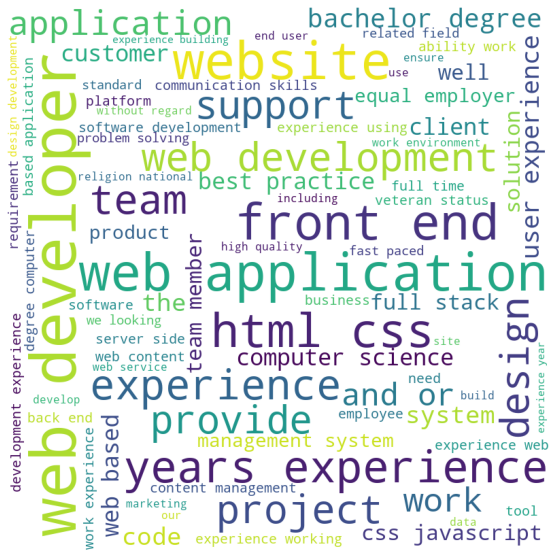

In [13]:
stop_words = ['position', 'this position', 'full time', 'part time', 'race', 'color', 'nationality', 'origin', 'sex', 'sexual', 'orientation', 'gender', 'identity']
stop_words += ['opportunity', 'and or'] # add words you don't want in word cloud

wordcloud = WordCloud(width = 800, 
                      height = 800, 
                      background_color = 'white', 
                      stopwords = stop_words, 
                      max_words = 80, 
                      min_font_size = 10).generate(' '.join(tokens))

#plot the word cloud
fig = plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()